# Introduction

Hello, in this notebook, I will be looking over some basic statistics that come from the San Francisco 49'ers 2020 NFL regular season. I was curious on what their fourth down conversion looked like so that is what the focus of this notebook will be. I plan to add more advanced stats and eventaully a script that also access to all NFL teams but for now, this is where we're at.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

## Importing the Data

The data that is being imported was collected by me through the [Football Reference Stats Page](https://www.pro-football-reference.com/). A copy of the current databse is available with more teams being added soon.

In [2]:
df = pd.read_csv('dataset.txt', header = 0)

In [3]:
df.head()

,team,opponent,quarterback,player,quarter,time,yards_to_go,success,score_diff,game_win
0,SFO,ARI,Garoppolo,Mostert,2,00:12:37,1,0,3,0
1,SFO,ARI,Garoppolo,Taylor,4,00:00:37,5,0,-4,0
2,SFO,PHI,Beathard,NaN,4,00:00:07,10,0,-5,0
3,SFO,MIA,Garoppolo,McKinnon,1,00:07:40,1,0,-7,0
4,SFO,MIA,Beathard,Aiyuk,4,00:07:36,2,0,-23,0


In [4]:
df.shape

(15, 10)

## Time Works

I created a different column changing the way the game clock time is portrayed to help with matplotlib formatting.

In [5]:
df

,team,opponent,quarterback,player,quarter,time,yards_to_go,success,score_diff,game_win
0,SFO,ARI,Garoppolo,Mostert,2,00:12:37,1,0,3,0
1,SFO,ARI,Garoppolo,Taylor,4,00:00:37,5,0,-4,0
2,SFO,PHI,Beathard,NaN,4,00:00:07,10,0,-5,0
3,SFO,MIA,Garoppolo,McKinnon,1,00:07:40,1,0,-7,0
4,SFO,MIA,Beathard,Aiyuk,4,00:07:36,2,0,-23,0
5,SFO,LAR,Garoppolo,Kittle,2,00:14:21,4,1,13,1
6,SFO,SEA,Garoppolo,Hasty,2,00:11:30,1,1,-6,0
7,SFO,SEA,Mullens,Aiyuk,4,00:10:51,1,1,-23,0
8,SFO,GNB,Mullens,Mullens,4,00:14:32,1,0,-28,0
9,SFO,NOR,Mullens,McKinnon,2,00:01:55,1,0,0,0


In [6]:
df['new_formatted_time'] =  pd.to_timedelta(df['time']).apply(lambda x: x.total_seconds())
df['new_formatted_time'] = df['new_formatted_time'] / 60

In [7]:
df.head()

,team,opponent,quarterback,player,quarter,time,yards_to_go,success,score_diff,game_win,new_formatted_time
0,SFO,ARI,Garoppolo,Mostert,2,00:12:37,1,0,3,0,12.616667
1,SFO,ARI,Garoppolo,Taylor,4,00:00:37,5,0,-4,0,0.616667
2,SFO,PHI,Beathard,NaN,4,00:00:07,10,0,-5,0,0.116667
3,SFO,MIA,Garoppolo,McKinnon,1,00:07:40,1,0,-7,0,7.666667
4,SFO,MIA,Beathard,Aiyuk,4,00:07:36,2,0,-23,0,7.600000


# Visualizations

The first thing I looked at was simply, how many of the fourth down attempts were successful. In addition, I also wanted to visualize the data because I believe that visualizations are a wonderful asset to use.

In [17]:
n = 0
s = 0
for index, row in df.iterrows():
    n += 1
    if row.success == 1:
        s += 1

print(f'49er\'s Fourth Down Conversion Rate : {(s/n) * 100}%')
print(f'Total Attempts : {n}')

49er's Fourth Down Conversion Rate : 40.0%
Total Attempts : 15


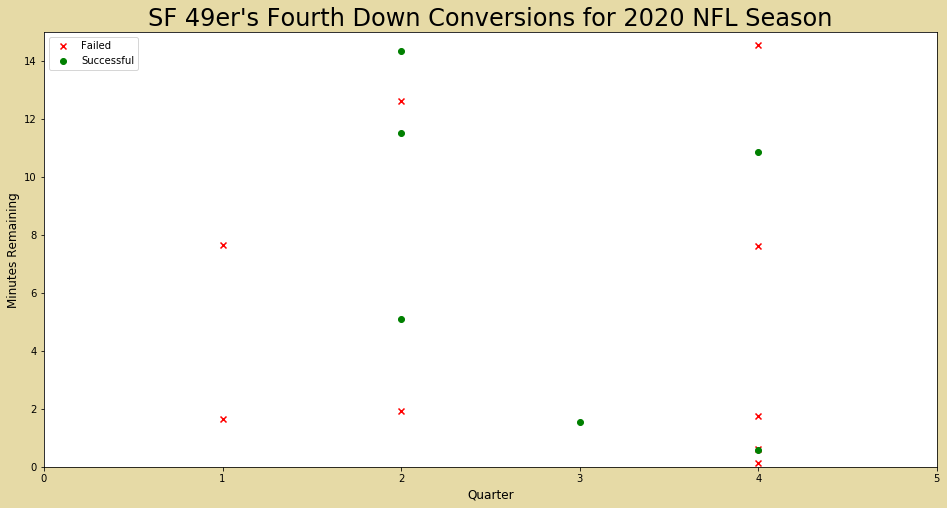

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

SuccessLabel = False
FailLabel = False

for index, row in df.iterrows():
    if row.success == 1:
        if SuccessLabel == False:
            ax.scatter(row.quarter, row.new_formatted_time, color = 'green', label = 'Successful')
            SuccessLabel = True
        else:
            ax.scatter(row.quarter, row.new_formatted_time, color = 'green')
    else:
        if FailLabel == False:
            ax.scatter(row.quarter, row.new_formatted_time, color = 'red',marker = 'x', label = 'Failed')
            FailLabel = True
        else:
            ax.scatter(row.quarter, row.new_formatted_time, color = 'red',marker = 'x')
plt.xlim(0, 5, 1)
plt.ylim(0, 15)
plt.xlabel('Quarter', size = 12)
plt.ylabel('Minutes Remaining', size = 12)
plt.title('SF 49er\'s Fourth Down Conversions for 2020 NFL Season', size = 24)
plt.legend(loc = 2)
fig.patch.set_facecolor('xkcd:beige')

From this graph, I noticed something interesting. While it makes sense that there are multuple fourth down conversion attempts near the bittom of the fourth quarter, I noticed that there seems to be a larger success rate when attempting a fourth down in the first half. This is apparent by having 3 out of the 5 fourth quarter attempts result in a successful conversion in the 2nd quarter.

With this information, I wanted to briefly take a look and determine which games, which included a fourth down conversion, resulted in a team win.

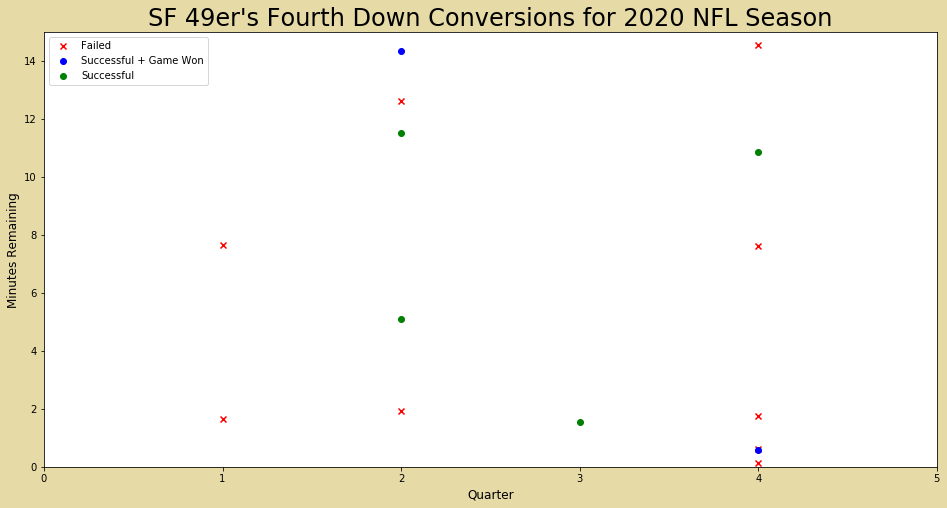

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

SuccessLabel = False
FailLabel = False
WinningLabel = False

for index, row in df.iterrows():
    if row.success == 1 and row.game_win == 1:

        if WinningLabel == False:
            ax.scatter(row.quarter, row.new_formatted_time, color = 'blue', label = 'Successful + Game Won')
            WinningLabel = True
        else:
            ax.scatter(row.quarter, row.new_formatted_time, color = 'blue')

    elif row.success == 1 and row.game_win == 0:
        if SuccessLabel == False:
            ax.scatter(row.quarter, row.new_formatted_time, color = 'green', label = 'Successful')
            SuccessLabel = True
        else:
            ax.scatter(row.quarter, row.new_formatted_time, color = 'green')
    else:
        if FailLabel == False:
            ax.scatter(row.quarter, row.new_formatted_time, color = 'red',marker = 'x', label = 'Failed')
            FailLabel = True
        else:
            ax.scatter(row.quarter, row.new_formatted_time, color = 'red',marker = 'x')
plt.xlim(0, 5, 1)
plt.ylim(0, 15)
plt.xlabel('Quarter', size = 12)
plt.ylabel('Minutes Remaining', size = 12)
plt.title('SF 49er\'s Fourth Down Conversions for 2020 NFL Season', size = 24)
plt.legend(loc = 2)
fig.patch.set_facecolor('xkcd:beige')

This plot seems a bit difficult to interpret. The one thing I would like to highlight is the fact that one of the successful fourth quarter conversions which happened in a game where the 49'ers ended up winning, occurred in the second quarter. This again leads me to believe that perhaps it is not a bad idea to go for fourth down conversions earlier in the game.

Following this, I wanted to determine how far away the team was after the third down which prompted them to go for a fourth down conversion rate. It is not surprising that a vast majority of fourth down conversion attempts happen when the team is about 1 yard away from the first down / goal. The outlier at around the 10 yard line can be explained by realizing that this attempt occurred at the tail end of a game in a last ditch effort to score points.

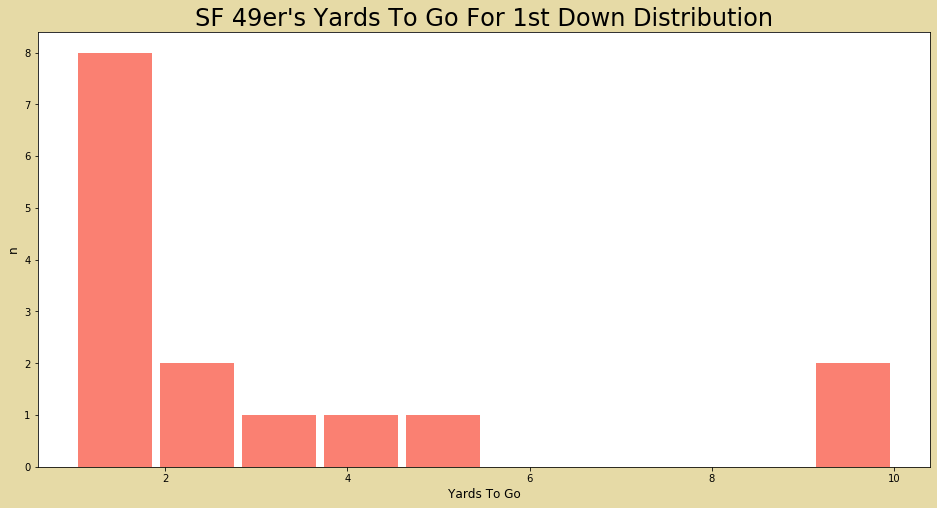

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8))
ax.hist(df.yards_to_go, color = 'salmon', rwidth = 0.9)
plt.title('SF 49er\'s Yards To Go For 1st Down Distribution', size = 24)
plt.xlabel('Yards To Go', size = 12)
plt.ylabel('n', size = 12)
fig.patch.set_facecolor('xkcd:beige')

The next plot I wanted to was actually determining which quarter are fourth down conversion attempts more popular. This was a surprising result. I expected the fourth down to have a surplus of attempts when compared to other quarters. While the fourth quarter did have the most attempts, it is not as clear cut as I was anticipating. It seems that going for fourth down plays is almost as popular as fourth down plays. This is explaining by the fact that after the half, the field resets. As a result, it makes sense to go all out and attempt procedures that may seem risky, such as going for fourth down conversions, before the half. 

Even then, the total amount of fourth down attempts in the first half is equal to 7 while the latter half adds up to 8. The San Francisco 49'ers seem to have an even distribution when it comes to determining which half is more popular in terms of fourth quarter conversion attempts.

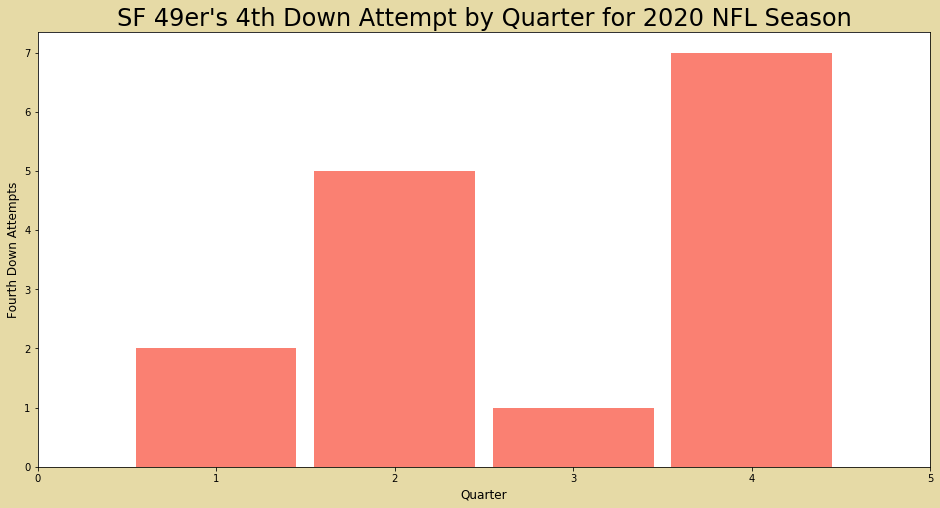

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8))
ax.hist(df.quarter, bins = range(1,7), color = 'salmon', align = 'left', rwidth = 0.9)
plt.title('SF 49er\'s 4th Down Attempt by Quarter for 2020 NFL Season', size = 24)
plt.xlabel('Quarter', size = 12)
plt.ylabel('Fourth Down Attempts', size = 12)
plt.xlim(0, 5)
fig.patch.set_facecolor('xkcd:beige')

Finally, I wanted to see if there was a clear favorite for who is handed the ball when going for a fourth down conversion. 

In [13]:
x = df.player
x = x.dropna()
u, counts = np.unique(x, return_counts=True)

Text(0.5, 1.0, "SF 49er's 4th Down Player Attempts by Quarter for 2020 NFL Season")

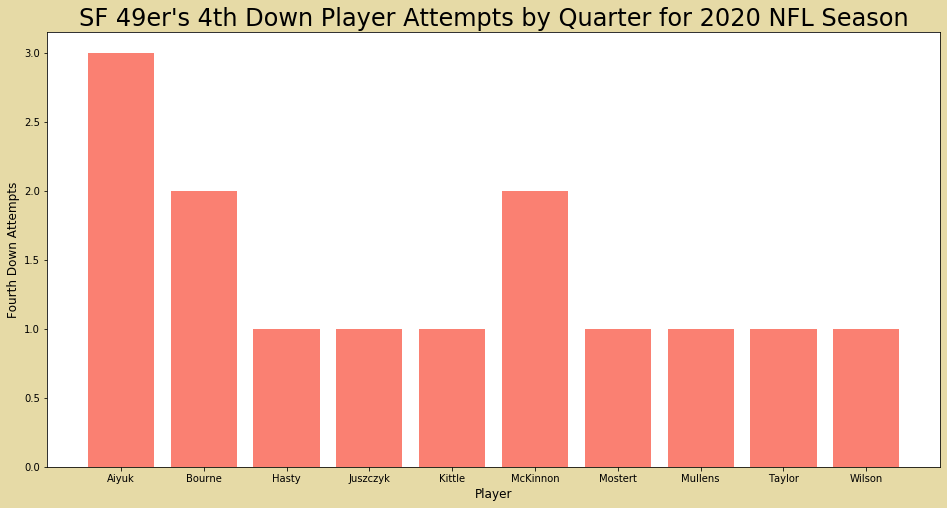

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8))
ax.bar(np.arange(len(u)), counts, color = 'salmon')
plt.xticks(np.arange(len(u)), u, size = 10)
fig.patch.set_facecolor('xkcd:beige')
plt.xlabel('Player', size = 12)
plt.ylabel('Fourth Down Attempts', size = 12)
plt.title('SF 49er\'s 4th Down Player Attempts by Quarter for 2020 NFL Season', size = 24)

It seems like Brandon Aiyuk is favored when determining who is going to attempt a fourth down conversion.

# Conclusion and Future Plans

From this brief analysis I would say that the San Francisco 49er's should attempt fourth down conversions earlier in the game. It may seem like a risky play but I believe that this risk will pay off in the end and may lead to more wins.

In the future, I want to incorporate more advanced statistics such as field position, formation, and play type. I also want to make this accessible for all teams.